# GEOG5995M Final Assignment

Student ID number: 201786290

In [1]:
# Load in the necessary libraries
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# Load in the data
ahah = pd.read_csv("AHAH/AHAH_V3_0.csv")
shape_data = gpd.read_file('Index_of_Multiple_Deprivation_IMD/Combined_Authorities/E47000001/shapefiles/E47000001.shp')
imd_data = pd.read_csv('Index_of_Multiple_Deprivation_IMD/Combined_Authorities/E47000001/tables/E47000001_2019.csv')        

The first dataset we use in this notebook is the AHAH dataset <a href="#ref1">[1]</a>. The AHAH (Access to Health Assets and Hazards) index is a multi-dimensional index which measures how 'healthy' neighbourhoods are. The version of data used in this notebook is up to date for 2022. A high AHAH score means that the LSOA is less healthy.

The second dataset is the IMD data with spatial data <a href="#ref2">[2]</a>. The IMD (Index of Multiple Deprivatiion) provides a measure of relative deprivation of LSOAs across the country. A high IMD score means that the LSOA is relatively more deprived.

The research question I wish to address is "Is there an association between how 'healthy' a meighbourhood is and how deprived it is?" I will attempt to carry out this investigation using both statistical and visual methods.

### Data Cleaning

The first step taken to clean the data is to merge the spatial data with the data from the IMD dataset. These data were retrieved from the same source so the spatial data corresponds with the numeric data so there are no clashes or missing data. The number of missing values in each column is checked using `list(imd.isna().sum())` which returns 0 for each column. The data types of each column are then checked. The data in this data frame are all correctly typed. Lastly the shape of the data is checked. There are 1673 rows in the data frame, representing the 1673 LSOAs in Greater Manchester.

In [3]:
# Merge the IMD Data with the shape data for LSOAs in Greater Manchester
imd  = pd.merge(shape_data, imd_data,  on='lsoa11cd',  how='left')
imd.head()

,lsoa11cd,geometry,CAUTH18NM,lsoa11nm,st_areasha,st_lengths,IMD_Rank,IMD_Decile,IMDScore,IMDRank0,...,IndRank,IndDec,OutScore,OutRank,OutDec,TotPop,DepChi,Pop16_59,Pop60.,WorkPop
0,E01004766,"POLYGON ((371566.994 411939.057, 371573.330 41...",Greater Manchester,Bolton 005A,5.118192e+05,4975.962449,7694,3,30.687,7694,...,1804,1,0.420,9257,3,1616,270,938,408,945.75
1,E01004767,"POLYGON ((371807.454 411860.927, 371890.446 41...",Greater Manchester,Bolton 005B,5.215145e+05,4780.471841,10776,4,24.997,10776,...,3324,2,0.604,7398,3,1777,299,1082,396,1085.75
2,E01004768,"POLYGON ((370197.187 414726.906, 370293.000 41...",Greater Manchester,Bolton 001A,3.911428e+06,10544.557643,28288,9,7.028,28288,...,29813,10,-0.397,21982,7,1546,274,882,390,891.00
3,E01004769,"POLYGON ((371924.312 413115.000, 372060.628 41...",Greater Manchester,Bolton 003A,4.056409e+05,3871.761886,24505,8,10.019,24505,...,18292,6,-0.191,18483,6,1459,224,827,408,834.75
4,E01004770,"POLYGON ((372572.594 412597.719, 372562.617 41...",Greater Manchester,Bolton 003B,4.412077e+05,4613.236257,22815,7,11.437,22815,...,11024,4,-0.072,16489,6,1436,282,705,449,712.75


In [4]:
# Check for any missing values in IMD data
list(imd.isna().sum())

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [5]:
# Check the data types of IMD data
list(imd.dtypes)

[dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype(

In [6]:
# Check the shape of the data
imd.shape

(1673, 61)

Next, the AHAH datset is checked for missing values and the data types are checked. Again, there are no missing values and all the data types are correct.

In [7]:
# Check for any missing values in AHAH data
list(ahah.isna().sum())

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [8]:
# Check data types of AHAH data
ahah.dtypes

lsoa11           object
ah3gp           float64
ah3dent         float64
ah3phar         float64
ah3hosp         float64
ah3blue         float64
ah3gpas         float64
ah3ffood        float64
ah3gamb         float64
ah3leis         float64
ah3pubs         float64
ah3tob          float64
ah3no2          float64
ah3so2          float64
ah3pm10         float64
ah3gp_rnk         int64
ah3dent_rnk       int64
ah3phar_rnk       int64
ah3hosp_rnk       int64
ah3leis_rnk       int64
ah3gpas_rnk       int64
ah3blue_rnk       int64
ah3no2_rnk        int64
ah3so2_rnk        int64
ah3pm10_rnk       int64
ah3gamb_rnk       int64
ah3pubs_rnk       int64
ah3tob_rnk        int64
ah3ffood_rnk      int64
ah3gp_pct         int64
ah3dent_pct       int64
ah3phar_pct       int64
ah3hosp_pct       int64
ah3leis_pct       int64
ah3gpas_pct       int64
ah3blue_pct       int64
ah3no2_pct        int64
ah3so2_pct        int64
ah3pm10_pct       int64
ah3gamb_pct       int64
ah3pubs_pct       int64
ah3tob_pct      

Now, the datasets are merged. Before this is possible, the column name for the LSOA code in the AHAH dataset needs to be changed to match that of the IMD dataset. The merging uses an inner join, which only uses the LSOAs that appear in both datasets. The IMD data had 1673 rows, so the number of rows in the merged data should also be 1673 if there are no LSOAs missing in the AHAH data. After checking the shape of the merged data, we can see that the number of rows is still 1673, meaning there are no missing LSOAs.

In [9]:
# Rename column for LSOA Code to match so the data can be merged
ahah = ahah.rename(columns={"lsoa11": "lsoa11cd"})
merged_data  = pd.merge(imd, ahah,  on='lsoa11cd')
merged_data.head()

,lsoa11cd,geometry,CAUTH18NM,lsoa11nm,st_areasha,st_lengths,IMD_Rank,IMD_Decile,IMDScore,IMDRank0,...,ah3g_rnk,ah3e_rnk,ah3r_rnk,ah3h_pct,ah3g_pct,ah3e_pct,ah3r_pct,ah3ahah,ah3ahah_rn,ah3ahah_pc
0,E01004766,"POLYGON ((371566.994 411939.057, 371573.330 41...",Greater Manchester,Bolton 005A,5.118192e+05,4975.962449,7694,3,30.687,7694,...,33707,26979,36302,30,81,65,87,28.293085,33623,81
1,E01004767,"POLYGON ((371807.454 411860.927, 371890.446 41...",Greater Manchester,Bolton 005B,5.215145e+05,4780.471841,10776,4,24.997,10776,...,27407,31743,38309,28,66,77,92,29.427250,34642,84
2,E01004768,"POLYGON ((370197.187 414726.906, 370293.000 41...",Greater Manchester,Bolton 001A,3.911428e+06,10544.557643,28288,9,7.028,28288,...,11899,19226,20726,53,29,47,50,13.484238,6351,16
3,E01004769,"POLYGON ((371924.312 413115.000, 372060.628 41...",Greater Manchester,Bolton 003A,4.056409e+05,3871.761886,24505,8,10.019,24505,...,7824,28322,26008,42,19,68,63,16.043950,12108,30
4,E01004770,"POLYGON ((372572.594 412597.719, 372562.617 41...",Greater Manchester,Bolton 003B,4.412077e+05,4613.236257,22815,7,11.437,22815,...,3614,31592,27034,50,9,76,65,18.163479,17142,42


In [10]:
# Check the shape of the merged data
merged_data.shape

(1673, 118)

### Statistical Modelling

In order to model whether there is an association between health and deprivation of a neighbourhood, I use a linear regression model. The model uses the IMD score as a predictor for the AHAH score. The model is a simple linear regression model with an intercept parameter. Using this model, the significance of the IMD parameter can be used to test whether there is or isn't an association between the two facotrs being considered by directly considering the parameters significance.

Our null hypothesis is that there is no association between the indices, meaning that the parameter for the IMD is insignificant. The alternative hypothesis is that the parameter for the IMD is significant and therefore there is an association between the IMD and the AHAH index.

The model summary shows that the IMD parameter has a p-value of 0.000 to 3 significant figures, meaning that the parameter is significant at the 99.9% significance level. Therefore there is strong evidence to suggest an association between the health and deprivation of a neighbourhood. Furthermore, the parameter is positive, which signifies a positive correlation. Hence, the models shows that the more deprived a LSOA is, the more likely it is to be unhealthy.

In [11]:
x = merged_data['IMDScore']
y = merged_data['ah3ahah']
X = sm.add_constant(x)
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ah3ahah   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     148.1
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           1.06e-32
Time:                        13:11:32   Log-Likelihood:                -5657.7
No. Observations:                1673   AIC:                         1.132e+04
Df Residuals:                    1671   BIC:                         1.133e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.9484      0.329     60.550      0.000      19.302      20.595
IMDScore       0.1161      0.010     12.168      0.000       0.097       0.135
==============================================================================
Omnibus:                      167.634   Durbin-Watson:                   1.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.124
Skew:                           0.762   Prob(JB):                     4.37e-53
Kurtosis:                       4.067   Cond. No.                         65.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Data Visualisation

The non-spatial visualisation chosen is a scatterplot of the AHAH and IMD scores of LSOAs in Greater Manchester with a fitted regression line to show the association. This visualisation shows us the distribution of scores so that we can see the correlation between the variables. We can also see the general trend between the variables by looking at the regression line.

The plot uses the `'x'` marker as it makes it easier the see the density of the points that are closer together as opposed to the default marker, for which there is a lot of overlap between the points on the scatterplot. The colour of the regression line is chosen to be red to contrast the blue scatterplot markers. This means that the line and points are clearly differentiable, even to those with colourblindness. A title was added to explain what the graph is showing, and for which population. The axis labels were adjusted to clearly describe the data visualised in the graph.

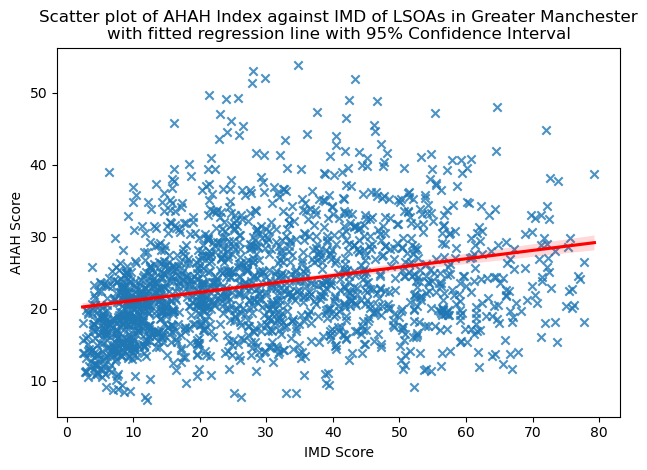

In [12]:
regplot = sns.regplot(data=merged_data, x='IMDScore',y='ah3ahah', marker='x', line_kws=dict(color="r"))
plt.title("Scatter plot of AHAH Index against IMD of LSOAs in Greater Manchester\nwith fitted regression line with 95% Confidence Interval")
plt.tight_layout()
plt.xlabel("IMD Score")
plt.ylabel("AHAH Score")
plt.show()

The spatial visualisation chosen is a choropleth map of Greater Manchester, showing the IMD decile which each LSOA falls under. This visualisation can be used to see which neighbourhoods are most deprived, which helps to determine which neighbourhoods are at risk of bad health, which can help policymakers decide where extra health facilitiies could be placed.

The colours used for this visualisation are from a yellow to red scale, with red representing the LSOAs with the most deprivation. This colour scale is intuitive as red is associated with danger or other negative connotations and it is also suitable for people with colourblindness.

A legend is shown so people can see which decile an LSOA falls under and the title clearly describes the visualisation.

/var/folders/y1/ssxnlwmd2m37pjl6z8f1w1yh0000gn/T/ipykernel_42044/91122547.py:4: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  merged_data.plot('IMD_Decile', legend=True, colormap='YlOrRd_r', ax=ax)


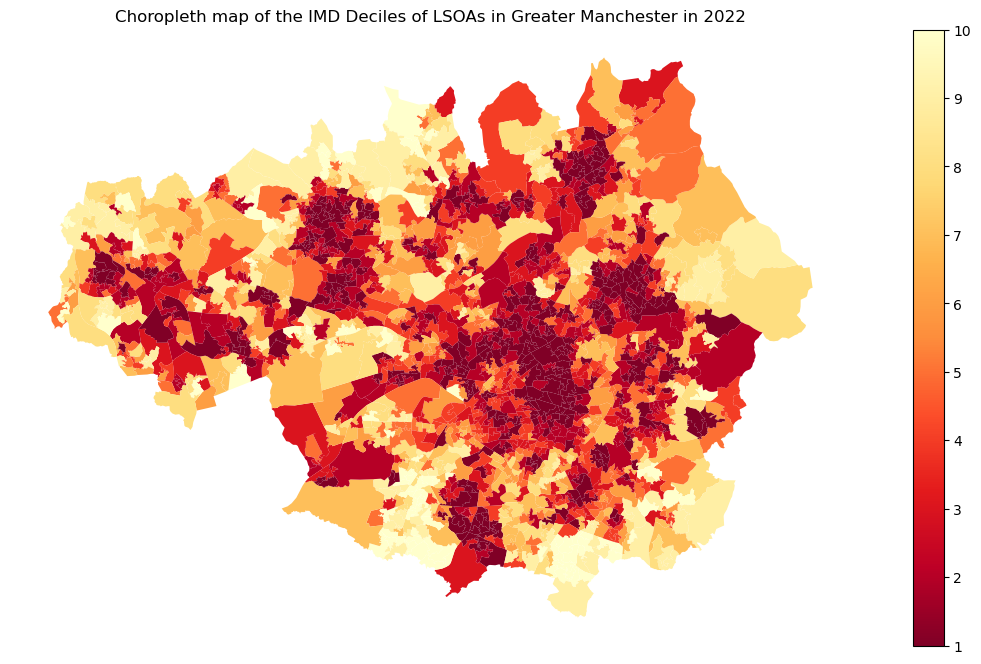

In [13]:
# Define axis
f,ax = plt.subplots(1, figsize=(16,8))
# Plot choropleth map using Red-Orange-Yellow colour map with legend
merged_data.plot('IMD_Decile', legend=True, colormap='YlOrRd_r', ax=ax)
# Set title
ax.set_title('Choropleth map of the IMD Deciles of LSOAs in Greater Manchester in 2022')
# Turn axis invisible
ax.set_axis_off()
plt.show()

## References
<p><a href="https://data.cdrc.ac.uk/dataset/access-healthy-assets-hazards-ahah">[1]</a> Consumer Data Research Centre. (2022). Access to Healthy Assets & Hazards (AHAH) [Dataset]. https://data.cdrc.ac.uk/dataset/access-healthy-assets-hazards-ahah</p>
<p><a href="https://data.cdrc.ac.uk/geodata-packs">[2]</a> Consumer Data Research Centre. (2019). Index of Multiple Deprivation IMD : Greater Manchester [Dataset]. https://data.cdrc.ac.uk/geodata-packs</p>
<p><a href="https://github.com/FrancescaPontin/GEOG5995">[3]</a> GEOG5995M Course Materials</p>
<p><a href="https://colorbrewer2.org/#type=sequential&scheme=YlOrRd&n=3">[3]</a> Colour Brewer 2.0</p>